# Homework 3

This homework will explore linear regression and resampling techniques by analysing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](!https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



In [1]:
# answer
!git clone https://gitlab.com/wgms/glathida.git

fatal: destination path 'glathida' already exists and is not an empty directory.


### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [2]:
# solution
import pandas
import geopandas 
import plotly 
import matplotlib
import rasterio
import numpy 
import netCDF4
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

Each row in the dataframe appears to be a different glacier. There are colunmns for the latitude and longitude of the glacier. Then there are estimates of the glacier's area, mean and max thickness of the glacier, and uncertainty in these estimates over particular time periods.

In [3]:
# solution
t_path = "glathida/data/glacier.csv"
df = pandas.read_csv(t_path)

df.head(5)

,id,survey_id,name,external_db,external_id,lat,lon,date,max_date,area,...,mean_thickness,mean_thickness_uncertainty,max_thickness,max_thickness_uncertainty,number_points,number_profiles,length_profiles,interpolation_method,flag,remarks
0,1,1,Isfallsglaciären,WGI,SE4B000E0006,67.91500,18.56800,1979-03-01,1979-03-31,1.3,...,72.0,NaN,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Rabots glaciär,WGI,SE4B000E1016,67.91000,18.49600,1979-03-01,1979-03-31,4.1,...,84.0,NaN,175.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN
2,3,1,Storglaciären,WGI,SE4B000E0005,67.90000,18.57000,1979-03-01,1979-03-31,3.1,...,99.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,South Cascade Glacier,WGI,US2M00264006,48.35698,-121.05735,1975-01-01,1975-12-31,2.0,...,99.0,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,Athabasca Glacier,FOG,7,52.17540,-117.28400,NaN,NaN,3.8,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.

### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [4]:
#answer below 
df.dropna(subset=['mean_thickness', 'area', 'mean_slope'],inplace=True)

## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

### Option 1: Tif and matplotlib

You can use the ``elevation`` data from the DEM seen in class. Download the DEM file (https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1)

In [5]:
!pip install wget
import wget

# solution
# Dowload the data using wget.
fname = 'HYP_50M_SR'
wget.download("https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1") # note the last character as a string to request the file itself


  Using cached wget-3.2-py3-none-any.whl


'HYP_50M_SR (9).tif'

In [6]:
#get digital elevation map
elevation = rasterio.open("HYP_50M_SR.tif")

elevation.shape

(5400, 10800)


___Tips___: when plotting a image in ``matplotlib`` you need to add information about the physical dimensions of the image. You can calculate the ``bounds``.

In [7]:
bounds = (elevation.bounds.left, elevation.bounds.right, \
          elevation.bounds.bottom, elevation.bounds.top)

We will use ``matplotlib.pyplot`` to show the raster image in the background (tips: use ``imshow()``. The raster image in matplotlib can only import one frame and not three (R, G, B) frames. We will first stack the three images together. 

In [8]:
red = elevation.read(1)
green = elevation.read(2)
blue = elevation.read(3)
pix = numpy.dstack((red, green, blue))

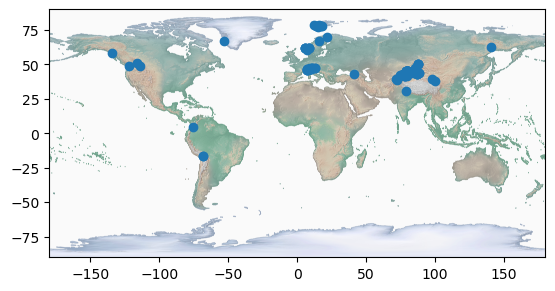

In [9]:
# solution
from rasterio.plot import show
plt.imshow(pix, extent = [bounds[0], bounds[1], bounds[2], bounds[3]])
plt.scatter(df['lon'], df['lat'])

## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

In [10]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe

## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with  of the features (example: km). ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

<Figure size 800x720 with 0 Axes>

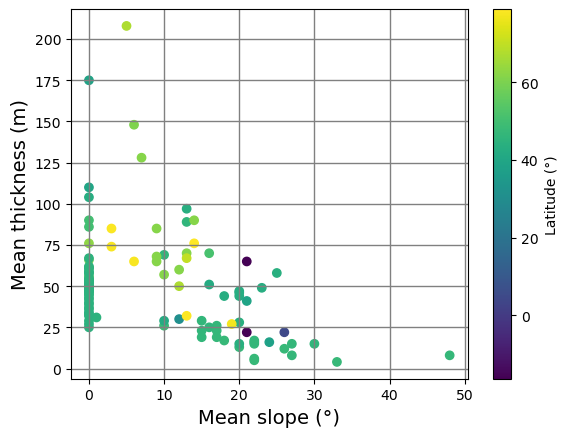

<Figure size 800x720 with 0 Axes>

In [16]:
# Figure 1: Mean slope vs mean thickness
# solution
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.scatter(df['mean_slope'], df['mean_thickness'], s=None, c=df['lat']) 
plt.xlabel('Mean slope (°)', fontsize=14)
plt.ylabel('Mean thickness (m)', fontsize=14)
plt.colorbar(label = "Latitude (°)")
figure(figsize=(10, 9), dpi=80)


<Figure size 800x720 with 0 Axes>

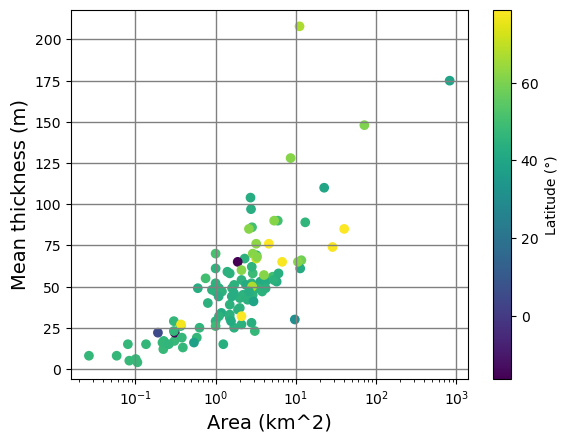

<Figure size 800x720 with 0 Axes>

In [19]:
# Figure 2: area vs mean thickness
# solution
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.scatter(df['area'], df['mean_thickness'], s=None, c=df['lat']) 
plt.xscale('log')
plt.xlabel('Area (km^2)', fontsize=14)
plt.ylabel('Mean thickness (m)', fontsize=14)
plt.colorbar(label = "Latitude (°)")
figure(figsize=(10, 9), dpi=80)


<Figure size 800x720 with 0 Axes>

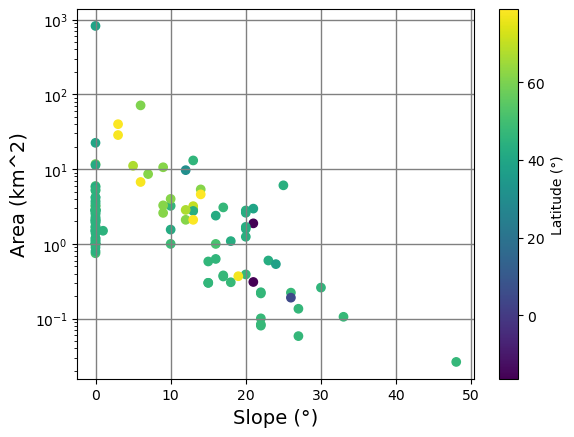

<Figure size 800x720 with 0 Axes>

In [21]:
# Figure 2: mean slope vs area
# solution
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.scatter(df['mean_slope'], df['area'], s=None, c=df['lat']) 
plt.yscale('log')
plt.xlabel('Slope (°)', fontsize=14)
plt.ylabel('Area (km^2)', fontsize=14)
plt.colorbar(label = "Latitude (°)")
figure(figsize=(10, 9), dpi=80)

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

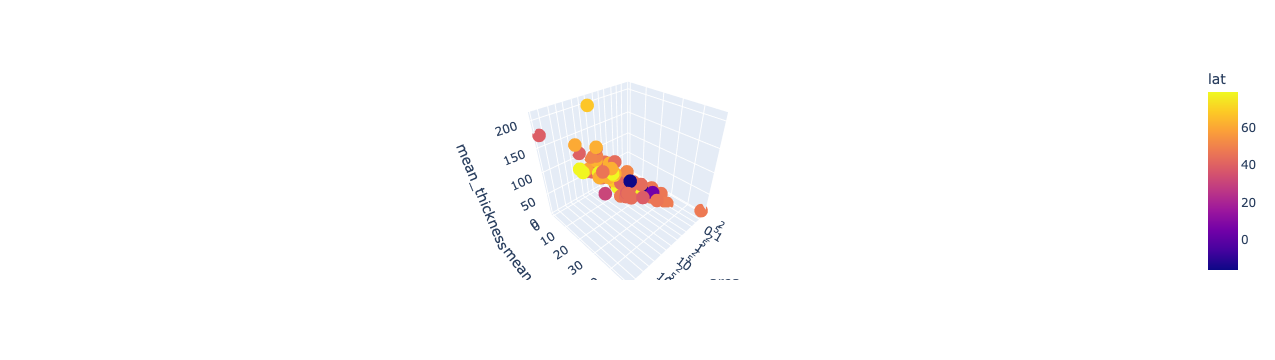

In [24]:
# solution

import plotly.express

fig = plotly.express.scatter_3d(df, x = 'area', log_x=True, y = 'mean_slope', z = 'mean_thickness', color = 'lat') 
fig.show()

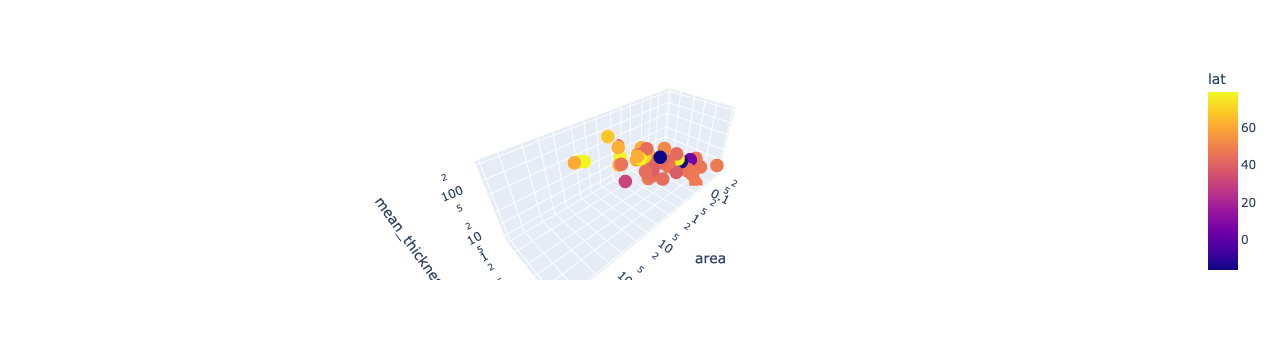

In [25]:
fig = plotly.express.scatter_3d(df, x = 'area', log_x=True, log_y = True, log_z=True, y = 'mean_slope', z = 'mean_thickness', color = 'lat') 
fig.show()

### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

/tmp/ipykernel_118/4273875173.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



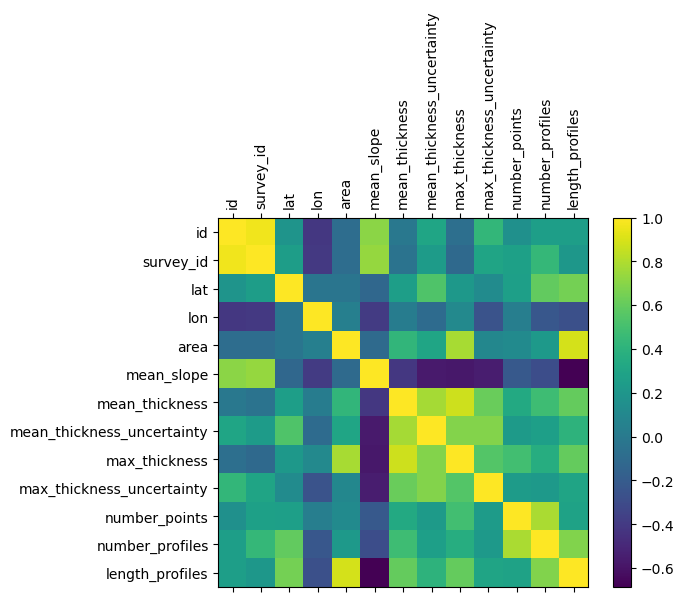

In [26]:
#solution

fig = plt.figure()
ax = fig.add_subplot(111)

cor_matrix = df.corr()

names = list(cor_matrix.columns)
n = len(names)

im =ax.matshow(cor_matrix)

ax.set_xticks(numpy.arange(n))
ax.set_xticklabels(names)
ax.set_yticks(numpy.arange(n))
ax.set_yticklabels(names)
plt.xticks(rotation=90)
cbar = plt.colorbar(im, ax=ax)
plt.show()

### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/). You can visualize the data by plotting data features against each other and explore visually data correlations.

<AxesSubplot: >

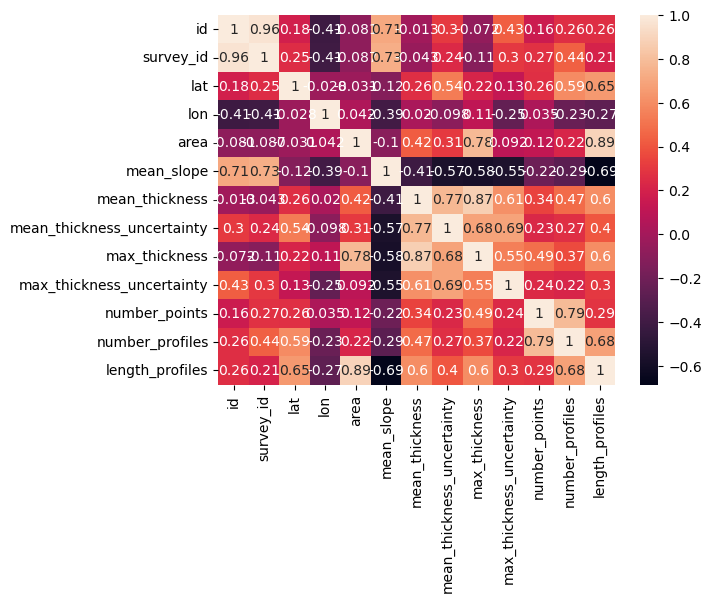

In [27]:
# solution
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

Discuss the basic correlations among the data. Do these correction make sense when you think about the shapes of glaciers?

Yes, area and mean thickness of glaciers are positively correlated, which makes sense because larger glaciers may be older or under conditions that allow them to grow/stay large which would lead to higher thickness. Mean slope and mean thickness are anticorrelated because glaciers on steep high mountain slopes will be constrained in growth. Mean slope and mean area are also anticorrelated for similar reasons.

## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [37]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# convert the data into numpy arrays.
E = numpy.asarray(df['mean_thickness']).reshape(-1, 1)# reshaping was necessary to be an argument of Linear regress
t = numpy.asarray(df['area']).reshape(-1, 1)

# perform the linear regression. First we will use the entire available data
regr = LinearRegression()
# we will first perform the fit:
regr.fit(numpy.log(t),E)
# We will first predict the fit:
Epred=regr.predict(numpy.log(t)) 

# The coefficients
print('Mean of slope: ', regr.coef_[0][0])

Mean of slope:  16.664982683005483


In [38]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error (mm): %.2f'
      % mean_squared_error(E, Epred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(E, Epred))

Mean squared error (mm): 425.52
Coefficient of determination: 0.59


Make a plot of the data and the linear regression you performed

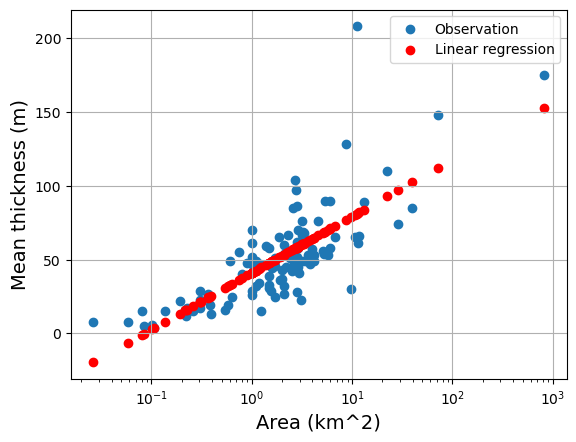

In [39]:
# solution
plt.scatter(t,E)
plt.scatter(t,Epred,color="red")
plt.grid(True)
plt.xticks()
plt.yticks()
plt.xscale('log')
plt.xlabel('Area (km^2)', fontsize=14)
plt.ylabel('Mean thickness (m)', fontsize=14)
plt.legend(['Observation', 'Linear regression'])
plt.show()

**Briefly comment on the quality of your fit and a linear regression (1 point)**

The fit appears to be pretty good except there are some outlying points that have very low or high area. 

### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

In [44]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit

loo = LeaveOneOut()

rs = ShuffleSplit(n_splits=n, test_size=.3, random_state=0)
for train_index, val_index in rs.split(E):
    E_train, E_val = E[train_index], E[val_index]
    t_train, t_val = t[train_index], t[val_index]

vel = numpy.zeros(len(E)) # initalize a vector to store the regression values
mse_train = numpy.zeros(len(E))
mse_val = numpy.zeros(len(E))
r2s = numpy.zeros(len(E))
i=0
for train_index, test_index in loo.split(E):    
    E_train, E_val = E[train_index], E[val_index]
    t_train, t_val = t[train_index], t[val_index]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    regr.fit(numpy.log(t_train),E_train)
    # We will first predict the fit:
    Epred_train=regr.predict(numpy.log(t_train)) 
    Epred_val=regr.predict(numpy.log(t_val))

    # The coefficients
    vel[i]= regr.coef_[0][0]
    mse_train[i]= mean_squared_error(E_train, Epred_train)
    mse_val[i]= mean_squared_error(E_val, Epred_val)
    r2s[i]=r2_score(E_val, Epred_val)
    i+=1

# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("Mean of slope %f4.2 and the standard deviation of slope %f4.2"%(numpy.mean(vel),numpy.std(vel)))
# the test error is the average of the mean-square-errors
print("CV = %4.2f"%(numpy.mean(mse_val)))

Mean of slope 16.6643334.2 and the standard deviation of slope 0.1588834.2
CV = 300.30


Text(0.5, 1.0, 'Random selection for data split')

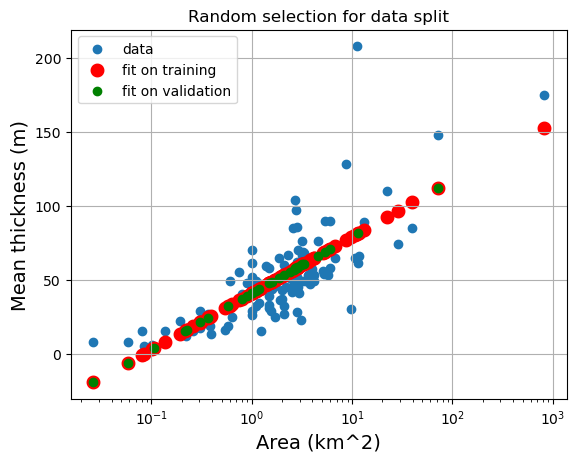

In [42]:
plt.scatter(t,E);plt.grid(True)
plt.scatter(t_train,Epred_train,color="red",linewidth=4)
plt.scatter(t_val,Epred_val,color="green")
plt.legend(['data','fit on training','fit on validation'])
plt.xscale('log')
plt.xlabel('Area (km^2)', fontsize=14)
plt.ylabel('Mean thickness (m)', fontsize=14)
plt.title('Random selection for data split')

### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

mean of the thickness estimates 16.3623114.2 and the standard deviation of slope 1.7801174.2


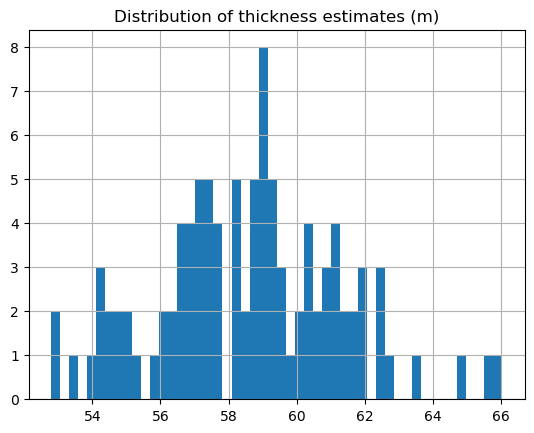

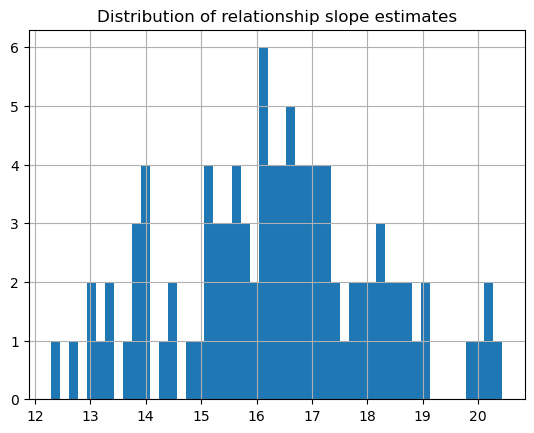

In [48]:
from sklearn.utils import resample
# solution

k=100

vel = numpy.zeros(k) # initalize a vector to store the regression values
mse = numpy.zeros(k)
r2s = numpy.zeros(k)
estimates = numpy.zeros(k)
i=0
for iik in range(k):    
    ii = resample(numpy.arange(len(E)),replace=True,n_samples=len(E))# new indices
    E_b, t_b = E[ii], t[ii]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    
    regr.fit(numpy.log(t_b),E_b)
    Epred_val=regr.predict(numpy.log(t)) # test on the validation set.

    # The coefficients
    vel[i]= regr.coef_[0][0]
    estimates[i] = Epred_val[0]
    i+=1

# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("mean of the thickness estimates %f4.2 and the standard deviation of slope %f4.2"%(numpy.mean(vel),numpy.std(vel)))

plt.hist(estimates,50);plt.title('Distribution of thickness estimates (m)');plt.grid(True)
plt.show()
plt.hist(vel,50);plt.title('Distribution of relationship slope estimates');plt.grid(True)
plt.show()

### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

Given glacier of area 10 km^2 , mean of the thickness estimates 78.4942294.2 and the standard deviation 3.6545514.2


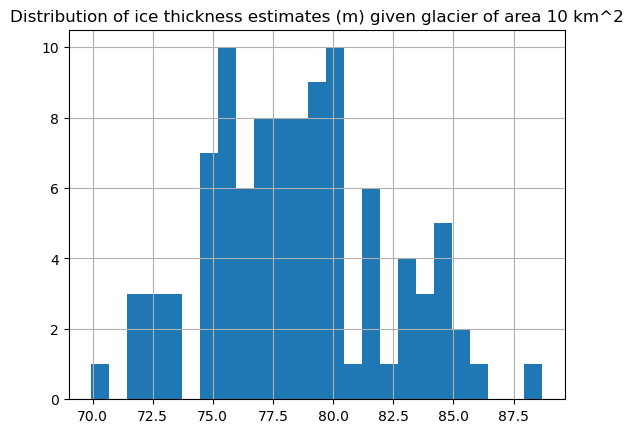

In [55]:
k=100

vel = numpy.zeros(k) # initalize a vector to store the regression values
mse = numpy.zeros(k)
r2s = numpy.zeros(k)
i=0
for iik in range(k):    
    ii = resample(numpy.arange(len(E)),replace=True,n_samples=len(E))# new indices
    E_b, t_b = E[ii], t[ii]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    
    regr.fit(numpy.log(t_b),E_b)
    Epred_val=regr.predict([[numpy.log(10)]])[0] # test on the validation set.
    #print(Epred_val)
    # The coefficients
    vel[i]= Epred_val
    i+=1

# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("Given glacier of area 10 km^2 , mean of the thickness estimates %f4.2 and the standard deviation %f4.2"%(numpy.mean(vel),numpy.std(vel)))

plt.hist(vel,25);plt.title('Distribution of ice thickness estimates (m) given glacier of area 10 km^2');plt.grid(True)
plt.show()